# "Customer Conversion To Client" Analysis based on Status Information

In [59]:
import pandas as pd
import numpy as np

In [60]:
data=pd.read_excel("1000 leads.xlsx")
print(data.head())
print(data.shape)

       Lead Name   Location        Status   \
0           Raja  hyderabad  Not Converted   
1  Anirudh Reddy       pune  Not Converted   
2   Sapna Dewani  bangalore     Converted    
3         suresh     mumbai  Not Converted   
4  Akshay Shinde  hyderabad  Not Converted   

                                  Status information  
0  14/8/prema: share me details, available in evn...  
1  14/8/prema: cal me tmrw, shared details to ema...  
2                                   16|AuG|moHan:rnr  
3  14/8/17(Surendra):i want only Server 16|AuG|mo...  
4  14/8/prema:rnr 16/8/prema: gave info, he said ...  
(1001, 4)


In [61]:
df= data.copy(deep=True)

In [62]:
df.columns

Index(['Lead Name', 'Location', 'Status ', 'Status information'], dtype='object')

In [63]:
df= df[['Status ','Status information']]
df

,Status,Status information
0,Not Converted,"14/8/prema: share me details, available in evn..."
1,Not Converted,"14/8/prema: cal me tmrw, shared details to ema..."
2,Converted,16|AuG|moHan:rnr
3,Not Converted,14/8/17(Surendra):i want only Server 16|AuG|mo...
4,Not Converted,"14/8/prema:rnr 16/8/prema: gave info, he said ..."
...,...,...
996,Not Converted,25/4/17(Surendra):please send me details tomor...
997,Not Converted,"24/4/17(prema): need CT, but our venue is far...."
998,Not Converted,24/Apr/moHan:intrstd in evng batch trail perd ...
999,Not Converted,1/5/17(Surendra):please share me details 11/5/...


In [64]:
df.rename(columns={'Status ': 'target', 'Status information': 'text'}, inplace= True)

In [65]:
df.sample()

,target,text
770,Not Converted,22/5/17(prema): shared details available on we...


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  998 non-null    object
 1   text    977 non-null    object
dtypes: object(2)
memory usage: 15.8+ KB


In [67]:
df.duplicated().sum()

26

In [68]:
df.target.value_counts()

Not Converted    856
Converted        124
NOt Converted     11
Conveted           7
Name: target, dtype: int64

# DATA CLEANING

In [69]:
df = df.drop_duplicates()
df.head()

,target,text
0,Not Converted,"14/8/prema: share me details, available in evn..."
1,Not Converted,"14/8/prema: cal me tmrw, shared details to ema..."
2,Converted,16|AuG|moHan:rnr
3,Not Converted,14/8/17(Surendra):i want only Server 16|AuG|mo...
4,Not Converted,"14/8/prema:rnr 16/8/prema: gave info, he said ..."


In [70]:
df.target.value_counts()

Not Converted    831
Converted        123
NOt Converted     11
Conveted           7
Name: target, dtype: int64

In [71]:
import warnings 
warnings.filterwarnings('ignore')

In [72]:
#there were some unnecessary spaces in the data.
df['target'] = df['target'].str.strip()

In [73]:
df['target']=df['target'].replace(['NOt Converted','Conveted'],['Not Converted','Converted'])
df['target'].value_counts()

Not Converted    842
Converted        130
Name: target, dtype: int64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 975 entries, 0 to 1000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  972 non-null    object
 1   text    973 non-null    object
dtypes: object(2)
memory usage: 22.9+ KB


In [75]:
df.isnull().sum()

target    3
text      2
dtype: int64

In [76]:
df.dropna(inplace=True)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970 entries, 0 to 1000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  970 non-null    object
 1   text    970 non-null    object
dtypes: object(2)
memory usage: 22.7+ KB


In [78]:
#changing the target column text to numbers
from sklearn.preprocessing import LabelEncoder
lbl =LabelEncoder()
df.target = lbl.fit_transform(df.target)

In [79]:
lbl.classes_

array(['Converted', 'Not Converted'], dtype=object)

In [80]:
df.target.value_counts()

1    841
0    129
Name: target, dtype: int64

In [81]:
#    0 : converted  and 1: Not Converted

# EDA

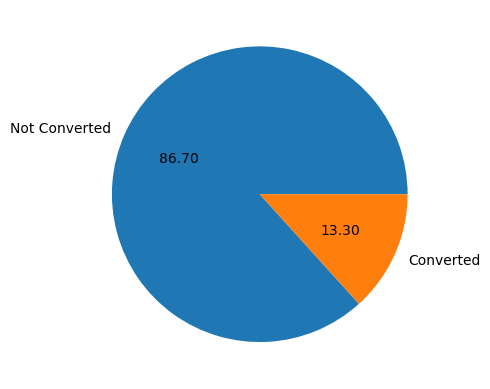

In [82]:
import matplotlib.pyplot as plt
plt.pie(df.target.value_counts(),labels=['Not Converted','Converted' ],autopct="%0.2f")
plt.show()

Dataset is imbalanced !!<br>
Since dataset is imbalanced and category 'Converted' is of more importance to us <br>
Hence **Recall** of model would be important.

In [83]:
# Understanding how many words, sentences are there in the dataset

In [84]:
import nltk
#nltk.download('punkt')

In [85]:
#creating a new column with number of alphbets

df['num_characters'] = df.text.apply(len)

In [86]:
# Creating column for number of words
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [87]:
df.head()

,target,text,num_characters,num_words
0,1,"14/8/prema: share me details, available in evn...",133,22
1,1,"14/8/prema: cal me tmrw, shared details to ema...",171,33
2,0,16|AuG|moHan:rnr,16,3
3,1,14/8/17(Surendra):i want only Server 16|AuG|mo...,86,18
4,1,"14/8/prema:rnr 16/8/prema: gave info, he said ...",118,24


# Understanding statisctics of above data

In [88]:
df[['num_characters','num_words']].describe()

,num_characters,num_words
count,970.000000,970.000000
mean,141.106186,32.190722
std,96.537518,23.163031
min,9.000000,2.000000
25%,71.000000,16.000000
50%,121.000000,27.000000
75%,188.000000,43.000000
max,797.000000,182.000000


In [89]:
stats =df[['target','num_characters','num_words']]
stats.head()

,target,num_characters,num_words
0,1,133,22
1,1,171,33
2,0,16,3
3,1,86,18
4,1,118,24


In [90]:
stats[stats.target==1].describe() #target Not converted

,target,num_characters,num_words
count,841.0,841.000000,841.000000
mean,1.0,141.545779,32.328181
std,0.0,94.727231,22.928237
min,1.0,9.000000,2.000000
25%,1.0,72.000000,16.000000
50%,1.0,123.000000,27.000000
75%,1.0,189.000000,44.000000
max,1.0,797.000000,182.000000


In [91]:
stats[stats.target==0].describe() #target converted

,target,num_characters,num_words
count,129.0,129.000000,129.000000
mean,0.0,138.240310,31.294574
std,0.0,107.958237,24.714432
min,0.0,9.000000,2.000000
25%,0.0,66.000000,15.000000
50%,0.0,108.000000,24.000000
75%,0.0,177.000000,41.000000
max,0.0,692.000000,137.000000


In [92]:
import seaborn as sns

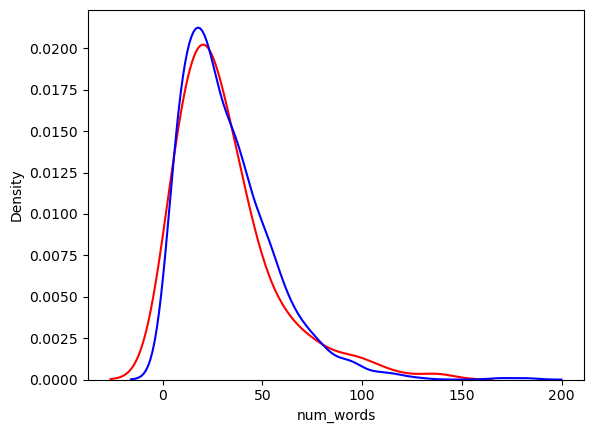

In [93]:
#graph for num of characters
sns.kdeplot(stats[stats['target']==0]['num_words'],color='red',label ='converted')
sns.kdeplot(stats[stats['target']==1]['num_words'],color='blue',label ='not-converted')
plt.legend
plt.show()

Observation : Nothing much could be inferred from above graph had there been any differnce in kde plot we could infer some important data.

# DATA PRE PROCESSING

comments: data contains stopwords, dates, names of representative, some spelling mistakes,chat shortforms,

In [94]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import nltk
from nltk.tokenize import word_tokenize

In [95]:
# remove abbrevation
def remove_abb(data):
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data= re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)  
    data = re.sub(r"donå«t", "do not", data)
    
    return data

In [96]:

def preprocess_all(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [97]:
import re

def removal_dates(text):
    
    t1= re.sub('\d{2}/\d{1}/[a-z]{5}'," ",text)
    t2=re.sub('^\d{1,2}\|\w{3}\|\w{5}$'," ",t1)
    t3 = re.sub('^\d{1,2}/\d{1,2}/\d{2}\([A-Za-z]+\)$'," ",t2)
    return t3

In [98]:
df['transformed_text'] = df.text.apply(preprocess_all)
df['transformed_text'] = df['transformed_text'].apply(remove_abb)
df['transformed_text'] = df['transformed_text'].apply(removal_dates)
df['transformed_text']

0       share detail avail evng postpon plan train cur...
1       cal tmrw share detail email share detail email...
2                                                     rnr
3                surendra want server cal busi reg server
4       rnr gave info said revert 1hr plan next month ...
                              ...                        
996     surendra pleas send detail tomorrow afternoon ...
997     prema need ct venu far share detail ds prema w...
998          intrstd evng batch trail perd alrdi reg exlr
999      surendra pleas share detail gowtham alreadi done
1000    prema share detail need cert prema need call 4...
Name: transformed_text, Length: 970, dtype: object

## CREATING WORDCLOD for both the status 

In [99]:
from wordcloud import WordCloud
wc = WordCloud(width=600,height=600,min_font_size=10,background_color='white')

In [102]:
converted = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" ")) #target converted
converted

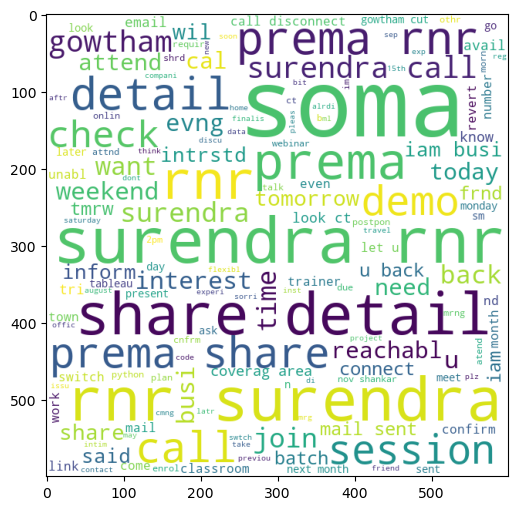

In [103]:
plt.figure(figsize=(15,6))
plt.imshow(converted)

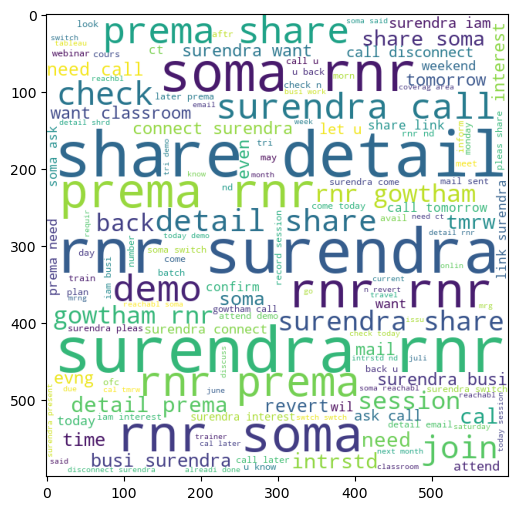

In [104]:
not_con = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" ")) #target Not converted
plt.figure(figsize=(15,6))
plt.imshow(not_con)

### LISTING THE MOST FREQUENT WORDS IN BOTH THE CATEGORIES

In [52]:
from collections import Counter

In [53]:
not_converted_corpus = []
for x in df[df['target'] == 1]['transformed_text']:
    for sent in x.split():
        not_converted_corpus.append(sent)

In [54]:
# For Not converted
Counter(not_converted_corpus).most_common(15)

[('rnr', 1108),
 ('surendra', 979),
 ('soma', 602),
 ('prema', 567),
 ('share', 522),
 ('detail', 462),
 ('call', 370),
 ('gowtham', 224),
 ('demo', 185),
 ('check', 151),
 ('need', 150),
 ('busi', 119),
 ('back', 119),
 ('session', 117),
 ('today', 114)]

In [55]:
converted_corpus = []
for x in df[df['target'] == 0]['transformed_text']:
    for sent in x.split():
        converted_corpus.append(sent)

In [56]:
Counter(converted_corpus).most_common(15)

[('rnr', 183),
 ('surendra', 145),
 ('prema', 96),
 ('share', 85),
 ('detail', 79),
 ('soma', 69),
 ('call', 51),
 ('demo', 25),
 ('session', 24),
 ('gowtham', 22),
 ('back', 20),
 ('check', 20),
 ('busi', 20),
 ('u', 19),
 ('join', 15)]

# MODEL BUILDING

In [57]:
# VECTORIZATION OF THE TEXT
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [108]:
X_cv = cv.fit_transform(df['transformed_text']).toarray()
X_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [58]:
X_cv = cv.fit_transform(df['transformed_text']).toarray()
X_tfidf = tfidf.fit_transform(df['transformed_text']).toarray()

converting the data into array as after the above process we will get a Sparse matrix<br>
and converting a sparse matrix into a dense array will reduce the size as well as speedup the computation

In [109]:
X_cv.shape

(970, 1085)

In [110]:
y =df['target'].values
y

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### Working With Count Vectorizer

In [111]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_cv,y,test_size=0.2,stratify=y,random_state=42)

In [ ]:
## Use stratified k -cross validation as dataset is imbalanced.

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
kernel = ['linear','rbf','sigmoid','poly']
C = [25, 10, 1.0, 0.1, 0.01]
gamma = ["scale", "auto"]
grid = dict(kernel=kernel,C=C,gamma=gamma)
grid_search_svc = GridSearchCV(estimator=SVC() , param_grid=grid, cv=5, scoring='accuracy',n_jobs=-1)
grid_result_svc = grid_search_svc.fit(X_train, y_train)

In [113]:
print("Best: %f using %s" % (grid_result_svc.best_score_, grid_result_svc.best_params_))

Best: 0.867270 using {'C': 25, 'gamma': 'auto', 'kernel': 'rbf'}


In [114]:
from sklearn.linear_model import LogisticRegression
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2','l1','elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train)

In [115]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.867270 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [116]:
lrc = LogisticRegression(C= 1.0, penalty= 'l2', solver = 'newton-cg')
lrc.fit(X_train,y_train)
y_pred= lrc.predict(X_test)


In [117]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = [3,5,7]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=grid, cv=5, scoring='accuracy',n_jobs=-1)
grid_result_knn = grid_search_knn.fit(X_train, y_train)

In [118]:
print("Best: %f using %s" % (grid_result_knn.best_score_, grid_result_knn.best_params_))

Best: 0.859529 using {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}


In [119]:
from sklearn.tree import DecisionTreeClassifier
criterion =['gini', 'entropy']
splitter = ['best', 'random']
max_depth =[5,10,15,20]
grid = dict(criterion = criterion ,splitter= splitter,max_depth= max_depth)
grid_search_DT = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=grid, cv=5, scoring='accuracy',n_jobs=-1)
grid_result_DT = grid_search_DT.fit(X_train, y_train)

In [120]:
print("Best: %f using %s" % (grid_result_DT.best_score_, grid_result_DT.best_params_))

Best: 0.859529 using {'criterion': 'gini', 'max_depth': 5, 'splitter': 'random'}


In [121]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
n_estimators = [200,350,500]
criterion = ['gini', 'entropy', 'log_loss']
max_depth = [8,16,24,32]
max_features = ['sqrt', 'log2', None]
grid = dict(n_estimators=n_estimators,criterion=criterion,max_depth=max_depth,max_features = max_features)
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv=5, scoring='accuracy',n_jobs=-1)
grid_result_rf = grid_search_rf.fit(X_train, y_train)

In [122]:
print("Best: %f using %s" % (grid_result_rf.best_score_, grid_result_rf.best_params_))

Best: 0.867270 using {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}


In [123]:
#   Trying every possible algorithm  

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [124]:
svc = SVC(C= 25, gamma= 'auto', kernel = 'rbf')
knc = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 7, weights= 'uniform')
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(criterion= 'entropy', max_depth= 5, splitter= 'random',)
lrc = LogisticRegression(C= 1.0, penalty= 'l2', solver= 'newton-cg')
rfc = RandomForestClassifier(criterion= 'entropy', max_depth = 8, max_features = None, n_estimators = 350)
abc = AdaBoostClassifier(n_estimators=350)
bc = BaggingClassifier(n_estimators=350)
gbdt = GradientBoostingClassifier(n_estimators=350)
xgb = XGBClassifier(n_estimators=350)

In [125]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1score = f1_score(y_test,y_pred)
    
    return accuracy,precision,recall,f1score

In [126]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'GBDT':gbdt,
    'xgb':xgb
}

In [127]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

accuracy_scores = []
precision_scores = []
recall_scores = []
F1_scores =[]

for name,clf in clfs.items():
    
    current_accuracy,current_precision,current_recall,current_F1Score = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Recall -",current_recall)
    print("F1_Score-",current_F1Score)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    F1_scores.append(current_F1Score)

For  SVC
Accuracy -  0.865979381443299
Precision -  0.865979381443299
Recall - 1.0
F1_Score- 0.9281767955801106
For  KN
Accuracy -  0.8608247422680413
Precision -  0.8652849740932642
Recall - 0.9940476190476191
F1_Score- 0.9252077562326869
For  NB
Accuracy -  0.8144329896907216
Precision -  0.8586956521739131
Recall - 0.9404761904761905
F1_Score- 0.8977272727272727
For  DT
Accuracy -  0.8608247422680413
Precision -  0.8691099476439791
Recall - 0.9880952380952381
F1_Score- 0.9247910863509748
For  LR
Accuracy -  0.8505154639175257
Precision -  0.8638743455497382
Recall - 0.9821428571428571
F1_Score- 0.9192200557103063
For  RF
Accuracy -  0.865979381443299
Precision -  0.865979381443299
Recall - 1.0
F1_Score- 0.9281767955801106
For  AdaBoost
Accuracy -  0.8041237113402062
Precision -  0.8693181818181818
Recall - 0.9107142857142857
F1_Score- 0.8895348837209303
For  BgC
Accuracy -  0.8298969072164949
Precision -  0.8609625668449198
Recall - 0.9583333333333334
F1_Score- 0.9070422535211268
Fo

In [128]:
accuracy_df=pd.DataFrame({'Algorthms': clfs.keys(), 'Accuracy':accuracy_scores, 'precision_scores':precision_scores,"Recall_Scores":recall_scores,"F1_Score":F1_scores}).sort_values(["Recall_Scores","F1_Score",'Accuracy'],ascending=False)
accuracy_df

,Algorthms,Accuracy,precision_scores,Recall_Scores,F1_Score
0,SVC,0.865979,0.865979,1.000000,0.928177
5,RF,0.865979,0.865979,1.000000,0.928177
1,KN,0.860825,0.865285,0.994048,0.925208
3,DT,0.860825,0.869110,0.988095,0.924791
8,GBDT,0.855670,0.864583,0.988095,0.922222
4,LR,0.850515,0.863874,0.982143,0.919220
9,xgb,0.845361,0.875000,0.958333,0.914773
7,BgC,0.829897,0.860963,0.958333,0.907042
2,NB,0.814433,0.858696,0.940476,0.897727
6,AdaBoost,0.804124,0.869318,0.910714,0.889535


In [129]:
# Tuning the hypermeter ngram

In [130]:
cv2 = CountVectorizer(ngram_range=(1,3))

In [131]:
X_cv2 = cv2.fit_transform(df['transformed_text']).toarray()

In [132]:
X_cv2.shape

(970, 12126)

In [133]:
from sklearn.model_selection import train_test_split
X_train_a2,X_test_a2,y_train_a2,y_test_a2 = train_test_split(X_cv2,y,test_size=0.2,stratify=y,random_state=42)

In [134]:
accuracy_scores_2 = []
precision_scores_2 = []
recall_scores_2 = []
F1_scores_2 =[]

for name,clf in clfs.items():
    
    current_accuracy_2,current_precision_2,current_recall_2,current_F1Score_2 = train_classifier(clf, X_train_a2,y_train_a2,X_test_a2,y_test_a2)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy_2)
    print("Precision - ",current_precision_2)
    print("Recall -",current_recall_2)
    print("F1_Score-",current_F1Score_2)
    accuracy_scores_2.append(current_accuracy_2)
    precision_scores_2.append(current_precision_2)
    recall_scores_2.append(current_recall_2)
    F1_scores_2.append(current_F1Score_2)

For  SVC
Accuracy -  0.865979381443299
Precision -  0.865979381443299
Recall - 1.0
F1_Score- 0.9281767955801106
For  KN
Accuracy -  0.8608247422680413
Precision -  0.8652849740932642
Recall - 0.9940476190476191
F1_Score- 0.9252077562326869
For  NB
Accuracy -  0.7628865979381443
Precision -  0.8719512195121951
Recall - 0.8511904761904762
F1_Score- 0.8614457831325301
For  DT
Accuracy -  0.8711340206185567
Precision -  0.8704663212435233
Recall - 1.0
F1_Score- 0.9307479224376731
For  LR
Accuracy -  0.8556701030927835
Precision -  0.8645833333333334
Recall - 0.9880952380952381
F1_Score- 0.9222222222222222
For  RF
Accuracy -  0.865979381443299
Precision -  0.865979381443299
Recall - 1.0
F1_Score- 0.9281767955801106
For  AdaBoost
Accuracy -  0.8247422680412371
Precision -  0.8764044943820225
Recall - 0.9285714285714286
F1_Score- 0.9017341040462428
For  BgC
Accuracy -  0.8505154639175257
Precision -  0.8677248677248677
Recall - 0.9761904761904762
F1_Score- 0.9187675070028012
For  GBDT
Accurac

In [135]:
accuracy_df_arr2=pd.DataFrame({'Algorthms': clfs.keys(), 'Accuracy':accuracy_scores_2, 'precision_scores':precision_scores_2,"Recall_Scores":recall_scores_2,"F1_Score":F1_scores_2}).sort_values(['Recall_Scores',"F1_Score",'Accuracy'],ascending=False)
accuracy_df_arr2

,Algorthms,Accuracy,precision_scores,Recall_Scores,F1_Score
3,DT,0.871134,0.870466,1.000000,0.930748
0,SVC,0.865979,0.865979,1.000000,0.928177
5,RF,0.865979,0.865979,1.000000,0.928177
1,KN,0.860825,0.865285,0.994048,0.925208
4,LR,0.855670,0.864583,0.988095,0.922222
7,BgC,0.850515,0.867725,0.976190,0.918768
8,GBDT,0.840206,0.866310,0.964286,0.912676
6,AdaBoost,0.824742,0.876404,0.928571,0.901734
9,xgb,0.809278,0.861878,0.928571,0.893983
2,NB,0.762887,0.871951,0.851190,0.861446


Comment : There is no significanct increase in any of the metric

In [136]:
#combining the results
pd.concat([accuracy_df,accuracy_df_arr2],axis=1,keys=["Basic",'Tuned'])


Basic                                                        Tuned  \
  Algorthms  Accuracy precision_scores Recall_Scores  F1_Score Algorthms   
0       SVC  0.865979         0.865979      1.000000  0.928177       SVC   
5        RF  0.865979         0.865979      1.000000  0.928177        RF   
1        KN  0.860825         0.865285      0.994048  0.925208        KN   
3        DT  0.860825         0.869110      0.988095  0.924791        DT   
8      GBDT  0.855670         0.864583      0.988095  0.922222      GBDT   
4        LR  0.850515         0.863874      0.982143  0.919220        LR   
9       xgb  0.845361         0.875000      0.958333  0.914773       xgb   
7       BgC  0.829897         0.860963      0.958333  0.907042       BgC   
2        NB  0.814433         0.858696      0.940476  0.897727        NB   
6  AdaBoost  0.804124         0.869318      0.910714  0.889535  AdaBoost   

                                                      
   Accuracy precision_scores Recall_Scores  F1_Score  
0  0.865979         0.865979      1.000000  0.928177  
5  0.865979         0.865979      1.000000  0.928177  
1  0.860825         0.865285      0.994048  0.925208  
3  0.871134         0.870466      1.000000  0.930748  
8  0.840206         0.866310      0.964286  0.912676  
4  0.855670         0.864583      0.988095  0.922222  
9  0.809278         0.861878      0.928571  0.893983  
7  0.850515         0.867725      0.976190  0.918768  
2  0.762887         0.871951      0.851190  0.861446  
6  0.824742         0.876404      0.928571  0.901734

### Using Voting Enseble technique

In [137]:
from sklearn.ensemble import VotingClassifier

#Using CountVectorizer with basic hyperparameters 

In [138]:
#using the top 3 classifiers as the base enstimators
estimators = [('svc',SVC(C= 25, gamma= 'auto', kernel = 'rbf')),('knn',KNeighborsClassifier(metric= 'manhattan', n_neighbors= 7, weights= 'uniform')),('rfc',RandomForestClassifier(criterion= 'entropy', max_depth = 8, max_features = None, n_estimators = 350))]

In [139]:
vot = VotingClassifier(estimators = estimators)
vot.fit(X_train, y_train)
y_pred = vot.predict(X_test)

In [140]:
y_pred.shape

(194,)

In [141]:
print("accuracy",accuracy_score(y_test,y_pred))
print("recall",recall_score(y_test,y_pred))
print("precision",precision_score(y_test,y_pred))

accuracy 0.865979381443299
recall 1.0
precision 0.865979381443299


In [142]:
# use CountVectorizer with tuning hyperparameters 

In [143]:
vot.fit(X_train_a2, y_train)
y_pred_tune = vot.predict(X_test_a2)

In [144]:
print("accuracy",accuracy_score(y_test,y_pred))
print("recall",recall_score(y_test,y_pred))
print("precision",precision_score(y_test,y_pred))

accuracy 0.865979381443299
recall 1.0
precision 0.865979381443299


**comment : no significant improvement** 

## Working With TfIDF transformed data

In [145]:
# NOW USING TIDF
X_ti = tfidf.fit_transform(df['transformed_text']).toarray()

In [146]:
print(X_ti)
print(X_ti.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(970, 1085)


In [147]:
df['transformed_text'][0]

'share detail avail evng postpon plan train current interest'

In [148]:
X_ti_nr = tfidf.fit_transform(df['transformed_text'])
print(X_ti_nr)
print(X_ti_nr.shape)

  (0, 520)	0.26762026734588984
  (0, 303)	0.4227328601320582
  (0, 983)	0.3558260556098485
  (0, 734)	0.37170066714991784
  (0, 753)	0.43443309156909515
  (0, 406)	0.33662506771711354
  (0, 165)	0.37170066714991784
  (0, 333)	0.15225495064301764
  (0, 881)	0.14666714164696978
  (1, 226)	0.3169396423065964
  (1, 141)	0.36326505616926674
  (1, 590)	0.2093414628865463
  (1, 803)	0.34276573397099
  (1, 834)	0.1921585785324091
  (1, 231)	0.14669741732729605
  (1, 383)	0.647249155485085
  (1, 967)	0.17869672210657114
  (1, 213)	0.16915175653665598
  (1, 333)	0.1882934333003383
  (1, 881)	0.18138299960968435
  (2, 837)	1.0
  (3, 810)	0.40026087817311135
  (3, 207)	0.2091036160863938
  (3, 871)	0.8213228880127832
  (3, 1023)	0.22016891760478013
  :	:
  (968, 466)	0.36959537198770603
  (968, 738)	0.46036670638384203
  (968, 364)	0.5237169736292062
  (968, 113)	0.4759754544821039
  (968, 933)	0.25161016694919286
  (968, 333)	0.2128209247206544
  (968, 881)	0.20501032366841315
  (969, 225)	0.1803

In [149]:
from sklearn.model_selection import train_test_split
X_train_ti,X_test_ti,y_train_ti,y_test_ti = train_test_split(X_ti,y,test_size=0.2,stratify=y,random_state=42)

In [150]:
accuracy_scores_tfidf = []
precision_scores_tfidf = []
recall_scores_tfidf = []
F1_scores_tfidf =[]

for name,clf in clfs.items():
    
    current_accuracy,current_precision,current_recall,current_F1Score = train_classifier(clf, X_train_ti,y_train_ti,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Recall -",current_recall)
    print("F1_Score-",current_F1Score)
    
    accuracy_scores_tfidf.append(current_accuracy)
    precision_scores_tfidf.append(current_precision)
    recall_scores_tfidf.append(current_recall)
    F1_scores_tfidf.append(current_F1Score)

For  SVC
Accuracy -  0.865979381443299
Precision -  0.865979381443299
Recall - 1.0
F1_Score- 0.9281767955801106
For  KN
Accuracy -  0.8556701030927835
Precision -  0.8645833333333334
Recall - 0.9880952380952381
F1_Score- 0.9222222222222222
For  NB
Accuracy -  0.865979381443299
Precision -  0.865979381443299
Recall - 1.0
F1_Score- 0.9281767955801106
For  DT
Accuracy -  0.8402061855670103
Precision -  0.8663101604278075
Recall - 0.9642857142857143
F1_Score- 0.9126760563380282
For  LR
Accuracy -  0.7577319587628866
Precision -  0.8538011695906432
Recall - 0.8690476190476191
F1_Score- 0.8613569321533924
For  RF
Accuracy -  0.865979381443299
Precision -  0.865979381443299
Recall - 1.0
F1_Score- 0.9281767955801106
For  AdaBoost
Accuracy -  0.7938144329896907
Precision -  0.8555555555555555
Recall - 0.9166666666666666
F1_Score- 0.8850574712643678
For  BgC
Accuracy -  0.4948453608247423
Precision -  0.85
Recall - 0.5059523809523809
F1_Score- 0.6343283582089552
For  GBDT
Accuracy -  0.505154639

In [151]:
accuracy_df_arr2=pd.DataFrame({'Algorthms': clfs.keys(), 'Accuracy':accuracy_scores_2, 'precision_scores':precision_scores_2,"Recall_Scores":recall_scores_2,"F1_Score":F1_scores_2}).sort_values(['Recall_Scores',"F1_Score",'Accuracy'],ascending=False)
accuracy_df_arr2

,Algorthms,Accuracy,precision_scores,Recall_Scores,F1_Score
3,DT,0.871134,0.870466,1.000000,0.930748
0,SVC,0.865979,0.865979,1.000000,0.928177
5,RF,0.865979,0.865979,1.000000,0.928177
1,KN,0.860825,0.865285,0.994048,0.925208
4,LR,0.855670,0.864583,0.988095,0.922222
7,BgC,0.850515,0.867725,0.976190,0.918768
8,GBDT,0.840206,0.866310,0.964286,0.912676
6,AdaBoost,0.824742,0.876404,0.928571,0.901734
9,xgb,0.809278,0.861878,0.928571,0.893983
2,NB,0.762887,0.871951,0.851190,0.861446


In [ ]:
Comment:
- We can use standard scaler before applying Logistic regression, SVC.